### TÍtulo do Projeto: "Análise e Diagnóstico Automatizado por Inteligência Artificial em Falhas em Exaustores Industriais"

Nome do dataset: MAFAULDA Machinery Fault Database
Descrição:  
Este banco de dados é composto de 1951 séries temporais multivariadas adquiridas por sensores em um simulador de falhas de máquinas (MFS) Alinhamento-Balanço-Vibração (ABVT) da SpectraQuest. O 1951 compreende seis diferentes estados simulados: função normal, falha de desequilíbrio, falhas de desalinhamento horizontal e vertical e falhas de rolamento interno e externo
Link: http://www02.smt.ufrj.br/~offshore/mfs/page_01.html Acesso em 10/08/2022.

Dicionário de variáveis:

Coluna 1 -  Sinal do tacômetro medidor da rotação do equipamento;

Colunas 2 a 4 - Acelerômetro LA (axial, direção radial tangencial);

Colunas 5 a 7 - Acelerômetro LOA (axial, direção radial tangencial);

Coluna 8 - Microfone


#### Coleta e concatenação dos dados
Os dados deste projeto foram distribuídos em vários arquivos do formato csv, o intuito deste jupyter é visualizar estes dados de modo geral e criar um dataset à partir de uma amostra extraída da concatenação dos mesmos. Este dataset concatenado será utilizado como fonte do estudo para treinar modelos de IA capazes de gerar análises automatizadas de um equipamento através de sensores medidores de vibrações mecânicas durante seu funcionamento.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import glob

In [2]:
# gerando a lista com os arquivos do diretório
lista_arquivo = []
for arquivo in glob.glob(r'C:\Users\Antonio\Documents\pos_IA\16projeto_integrado\banco_de_dados\normal\*csv'):
    lista_arquivo.append(arquivo)

In [3]:
# Total de arquivos deste diretório
print(len(lista_arquivo))

49


In [4]:
# Criando os dataframes e nomeando as colunas
dataframes = []
for arquivo in lista_arquivo:
    dataframes.append(pd.read_csv(arquivo, sep=',', names=['Tacômetro', '3A','3H','3V', '4A', '4H', '4V', 'Microfone']))

In [5]:
dataframes

[        Tacômetro        3A        3H        3V        4A        4H        4V  \
 0         4.55950  0.175200  0.287210 -0.017751 -0.415650  0.032459 -0.112180   
 1         4.60380 -0.051295 -0.194050 -0.060071 -0.418090  0.036547 -0.110430   
 2         4.57030 -0.969080  0.038033 -0.028329 -0.430810  0.041924 -0.143310   
 3         4.58700  0.891270  0.072973  0.007453 -0.400170  0.041090 -0.119840   
 4         4.58870 -1.716000 -0.329290 -0.033063 -0.502810  0.040474 -0.252700   
 ...           ...       ...       ...       ...       ...       ...       ...   
 249995   -0.33352 -0.767530 -0.383180 -0.065833  0.052855 -0.000624  0.033041   
 249996   -0.43764  0.125980  0.225880 -0.009517  0.106850  0.000140  0.088866   
 249997   -0.26109  0.118680 -0.225380 -0.063392  0.043998 -0.000380  0.042475   
 249998   -0.45957 -0.793080 -0.105010 -0.051047  0.037756  0.004440 -0.000873   
 249999   -0.24359  1.002700  0.109100 -0.018489  0.169610  0.003927  0.120810   
 
         Micro

In [6]:
dataframes[2]

,Tacômetro,3A,3H,3V,4A,4H,4V,Microfone
0,4.47690,-1.70450,-0.076488,-0.051497,-0.56721,0.041456,-0.031897,0.040889
1,4.46430,1.72010,0.273950,0.021210,-0.45291,0.039043,0.069768,-0.033122
2,4.49410,-1.60530,-0.253730,-0.076687,-0.57488,0.039409,-0.049242,0.192220
3,4.45020,1.28430,0.372430,0.055843,-0.45892,0.041880,0.054420,-0.140550
4,4.50030,-0.84995,-0.234240,-0.060778,-0.55874,0.039916,-0.035808,0.254240
...,...,...,...,...,...,...,...,...
249995,-0.68967,-1.24400,-0.413980,-0.010403,-1.68050,-0.027827,-0.516660,0.300790
249996,-0.67424,1.63850,0.330510,0.106750,-1.57350,-0.020986,-0.405530,-0.187500
249997,-0.73249,-0.64631,-0.448930,-0.035921,-1.65740,-0.040964,-0.493380,0.386050
249998,-0.63669,0.61672,0.229510,0.043511,-1.59620,-0.069496,-0.448700,-0.144640


In [7]:
# Como cada dataframe possui 250000 linhas foi definido reduzir os dataframes pelos índices próximos 120000 a 130000
# Reduzindo a quantidade de linhas dos dataframes para facilitar o processamento
reduzidos = []
for dataframe in dataframes:
    reduzidos.append(dataframe[120000:130000])

In [8]:
reduzidos

[        Tacômetro       3A        3H        3V        4A        4H        4V  \
 120000    4.51920 -0.98485 -0.169530 -0.051034  0.267570  0.002245 -0.105750   
 120001    4.46670  0.26287  0.322050  0.042592  0.311840  0.007520 -0.059260   
 120002    4.51140 -0.11531 -0.064270 -0.037861  0.293170  0.005171 -0.076734   
 120003    4.47910 -0.74484  0.101980 -0.027173  0.255400  0.004549 -0.117480   
 120004    4.49330  0.86974  0.151620 -0.025156  0.320340  0.002848 -0.057302   
 ...           ...      ...       ...       ...       ...       ...       ...   
 129995   -0.66032  0.94397  0.378080  0.047185 -0.002571  0.042919 -0.136180   
 129996   -0.78958 -0.20866 -0.030447 -0.008020 -0.045318  0.043709 -0.176090   
 129997   -0.70784  0.26605  0.277960  0.047782 -0.038928  0.050043 -0.163190   
 129998   -0.77992  0.53819  0.101770  0.025083 -0.037553  0.047078 -0.158250   
 129999   -0.71061 -0.77721  0.058024  0.020587 -0.114490  0.046109 -0.213220   
 
         Microfone  
 1200

In [9]:
# concatenando os dataframes reduzidos, o 'ignore_index' serve para ignorar os índices, ou seja,
# criar um índice pela concatenização.
reduzidos_concatenados = pd.concat(reduzidos, ignore_index=True)

In [10]:
# dataset concatenado
reduzidos_concatenados

,Tacômetro,3A,3H,3V,4A,4H,4V,Microfone
0,4.51920,-0.984850,-0.16953,-0.051034,0.26757,0.002245,-0.105750,0.162460
1,4.46670,0.262870,0.32205,0.042592,0.31184,0.007520,-0.059260,-0.130620
2,4.51140,-0.115310,-0.06427,-0.037861,0.29317,0.005171,-0.076734,0.142160
3,4.47910,-0.744840,0.10198,-0.027173,0.25540,0.004549,-0.117480,-0.050232
4,4.49330,0.869740,0.15162,-0.025156,0.32034,0.002848,-0.057302,0.047412
...,...,...,...,...,...,...,...,...
489995,-0.74681,0.125890,-0.27430,0.381410,-0.18969,-0.037460,-1.104000,0.144200
489996,-0.72207,0.304480,0.58029,0.246580,-0.17408,-0.035310,-1.039700,-0.222450
489997,-0.77913,-0.434830,-0.38094,-0.224570,-0.18981,-0.040194,-1.121300,0.289960
489998,-0.73260,0.089552,0.39362,-0.533910,-0.17774,-0.037563,-1.150000,-0.275530


In [11]:
# informações
reduzidos_concatenados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490000 entries, 0 to 489999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Tacômetro  490000 non-null  float64
 1   3A         490000 non-null  float64
 2   3H         490000 non-null  float64
 3   3V         490000 non-null  float64
 4   4A         490000 non-null  float64
 5   4H         490000 non-null  float64
 6   4V         490000 non-null  float64
 7   Microfone  490000 non-null  float64
dtypes: float64(8)
memory usage: 29.9 MB


In [12]:
# Estatística descritiva
reduzidos_concatenados.describe()

,Tacômetro,3A,3H,3V,4A,4H,4V,Microfone
count,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000,490000.000000
mean,-0.008031,0.009220,-0.000933,0.000582,0.018111,0.002708,-0.034658,0.012274
std,1.704128,0.855164,0.418753,0.183841,0.590073,0.033607,0.423528,0.175105
min,-1.558800,-4.054100,-2.369600,-2.171700,-2.396400,-0.182530,-2.865800,-0.462590
25%,-0.713430,-0.559500,-0.287530,-0.085230,-0.290630,-0.021577,-0.246950,-0.124390
50%,-0.651170,0.078134,0.012369,0.001473,0.027432,0.003811,-0.006604,-0.006253
75%,-0.540480,0.655720,0.298100,0.085812,0.339020,0.027607,0.222110,0.133060
max,5.085600,2.280700,3.314500,1.455800,2.511000,0.198450,1.855200,0.822310


In [13]:
# Criando um label para os dados
reduzidos_concatenados['Condição'] = 'Normal'

In [14]:
# Nestes dados o equipamento está com a condição normal pois não está com falha
reduzidos_concatenados.head()

,Tacômetro,3A,3H,3V,4A,4H,4V,Microfone,Condição
0,4.5192,-0.98485,-0.16953,-0.051034,0.26757,0.002245,-0.105750,0.162460,Normal
1,4.4667,0.26287,0.32205,0.042592,0.31184,0.007520,-0.059260,-0.130620,Normal
2,4.5114,-0.11531,-0.06427,-0.037861,0.29317,0.005171,-0.076734,0.142160,Normal
3,4.4791,-0.74484,0.10198,-0.027173,0.25540,0.004549,-0.117480,-0.050232,Normal
4,4.4933,0.86974,0.15162,-0.025156,0.32034,0.002848,-0.057302,0.047412,Normal


In [15]:
# eliminando a coluna 'Tacômetro', pois por conhecimento do domínio do problema este não colabora para determinar as falhas 
# em questão, além disso o foco são as medições de vibração realizadas nos demais pontos ou colunas do dataset
df_normal = reduzidos_concatenados.iloc[:,1:]
df_normal.tail()

,3A,3H,3V,4A,4H,4V,Microfone,Condição
489995,0.125890,-0.27430,0.38141,-0.18969,-0.037460,-1.1040,0.14420,Normal
489996,0.304480,0.58029,0.24658,-0.17408,-0.035310,-1.0397,-0.22245,Normal
489997,-0.434830,-0.38094,-0.22457,-0.18981,-0.040194,-1.1213,0.28996,Normal
489998,0.089552,0.39362,-0.53391,-0.17774,-0.037563,-1.1500,-0.27553,Normal
489999,-0.618000,-0.44308,-0.52651,-0.17058,-0.036016,-1.3002,0.25645,Normal


In [16]:
# formato dos dados
df_normal.shape

(490000, 8)

In [17]:
df_normal.iloc[48000]

3A            0.31005
3H            0.33694
3V           0.027441
4A            -0.0875
4H          -0.023341
4V           -0.09259
Microfone    -0.15841
Condição       Normal
Name: 48000, dtype: object

In [18]:
df_normal.iloc[48999]

3A             1.1082
3H            0.44295
3V           0.040717
4A            0.96575
4H           0.051172
4V            0.33521
Microfone    -0.15805
Condição       Normal
Name: 48999, dtype: object

In [19]:
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490000 entries, 0 to 489999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   3A         490000 non-null  float64
 1   3H         490000 non-null  float64
 2   3V         490000 non-null  float64
 3   4A         490000 non-null  float64
 4   4H         490000 non-null  float64
 5   4V         490000 non-null  float64
 6   Microfone  490000 non-null  float64
 7   Condição   490000 non-null  object 
dtypes: float64(7), object(1)
memory usage: 29.9+ MB


Visualizando os dados

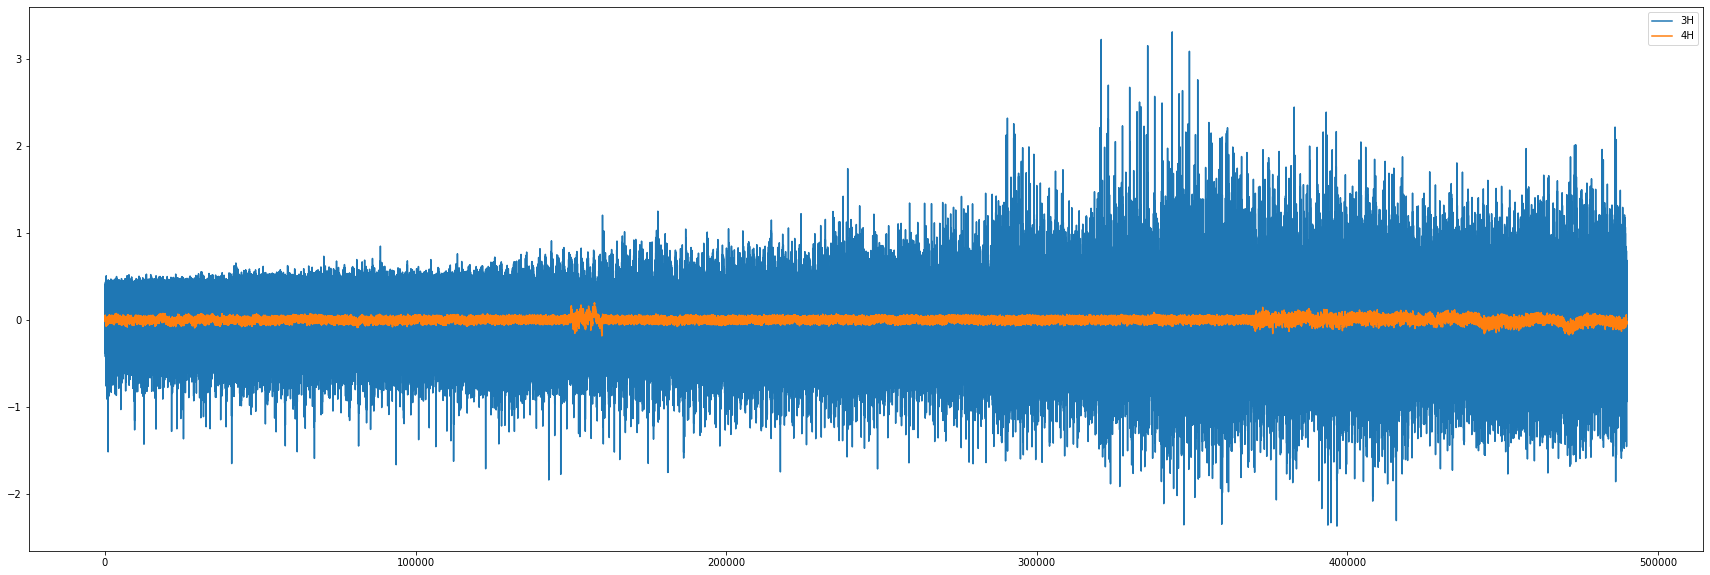

In [20]:
df_normal[['3H', '4H']].plot(figsize=(30,10));

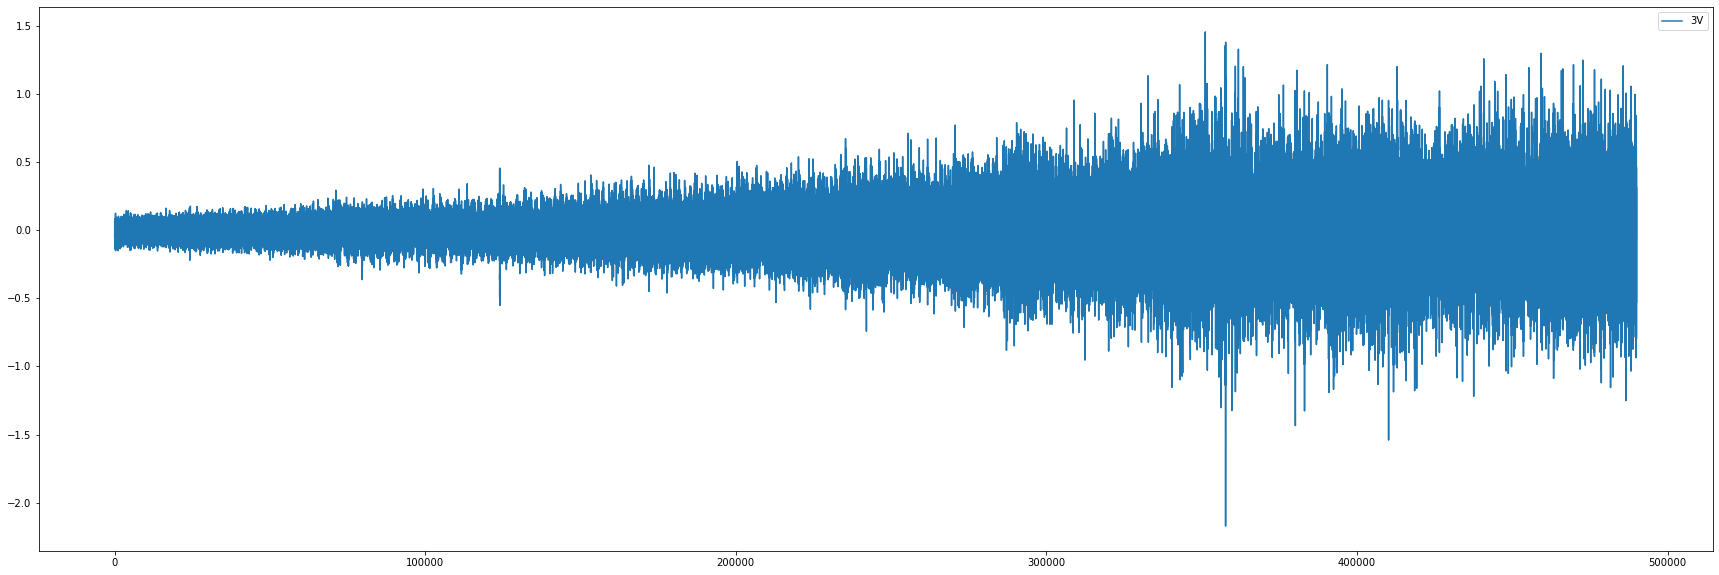

In [21]:
df_normal[['3V']].plot(figsize=(30,10));

Exportando o dataframe

In [22]:
# exportando o dataframe concatenado para um arquivo csv
# Importando a biblioteca pathlib
from pathlib import Path  
filepath = Path(r'C:\Users\Antonio\Documents\pos_IA\16projeto_integrado\dados\normal\normal_concatenado.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)
df_normal.to_csv(filepath)

In [23]:
# gerando a lista com os arquivos do diretório
lista_arquivo = []
for arquivo in glob.glob(r'C:\Users\Antonio\Documents\pos_IA\16projeto_integrado\dados\imbalance\35g\*csv'):
    lista_arquivo.append(arquivo)

In [24]:
# Total de arquivos deste diretório
print(len(lista_arquivo))

45


In [25]:
# Criando os dataframes e nomeando as colunas
dataframes = []
for arquivo in lista_arquivo:
    dataframes.append(pd.read_csv(arquivo, sep=',', names=['Tacômetro', '3A','3H','3V', '4A', '4H', '4V', 'Microfone']))

C:\Users\Antonio\AppData\Local\Temp\ipykernel_8284\1013519746.py:4: DtypeWarning: Columns (1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(arquivo, sep=',', names=['Tacômetro', '3A','3H','3V', '4A', '4H', '4V', 'Microfone']))


In [26]:
# Reduzindo a quantidade de linhas dos dataframes para facilitar o processamento
reduzidos = []
for dataframe in dataframes:
    reduzidos.append(dataframe[120000:130000])

In [27]:
# concatenando os dataframes reduzidos, o 'ignore_index' serve para ignorar os índices, ou seja,
# criar um índice pela concatenização.
reduzidos_concatenados = pd.concat(reduzidos, ignore_index=True)

In [28]:
# dataset concatenado
reduzidos_concatenados

,Tacômetro,3A,3H,3V,4A,4H,4V,Microfone
0,-0.57321,1.3882,0.37888,0.004087,-0.31487,-0.014177,-0.17457,-0.13697
1,-0.58471,0.65285,-0.008811,-0.036859,-0.34948,-0.027327,-0.19829,0.080244
2,-0.50202,0.86068,0.23628,-0.028984,-0.35797,-0.017951,-0.20064,-0.071868
3,-0.62703,1.2071,0.11815,-0.027822,-0.33238,-0.020319,-0.16756,-0.009709
4,-0.50592,0.59546,-0.0423,-0.03842,-0.38188,-0.016411,-0.19427,-0.040132
...,...,...,...,...,...,...,...,...
449996,0.75458,-0.32762,0.41705,0.91453,-0.010577,0.9224,-0.061792,Desbalanceado
449997,-1.6056,-1.0672,0.29002,0.82736,-0.010564,0.82784,0.18718,Desbalanceado
449998,0.080844,-0.30642,0.33467,0.87823,-0.012566,0.88698,-0.1534,Desbalanceado
449999,-0.74278,-1.0328,0.21745,0.85669,0.000102,0.89208,0.26672,Desbalanceado


In [29]:
# Estatística descritiva
reduzidos_concatenados.describe()

,Tacômetro,3A,3H,3V,4A,4H,4V,Microfone
count,450001.0000,450001.0000,450001.000,450001.00000,450001.00000,450001.000000,450001.0000,450001
unique,79898.0000,182307.0000,196966.000,174531.00000,170442.00000,53760.000000,189824.0000,35162
top,4.3934,1.0002,-1.086,-0.10382,0.12269,0.002091,1.0048,Desbalanceado
freq,46.0000,29.0000,22.000,15.00000,23.00000,44.000000,19.0000,10001


In [30]:
# Criando um label para os dados
reduzidos_concatenados['Condição'] = 'Desbalanceado'

In [31]:
reduzidos_concatenados.head()

,Tacômetro,3A,3H,3V,4A,4H,4V,Microfone,Condição
0,-0.57321,1.3882,0.37888,0.004087,-0.31487,-0.014177,-0.17457,-0.13697,Desbalanceado
1,-0.58471,0.65285,-0.008811,-0.036859,-0.34948,-0.027327,-0.19829,0.080244,Desbalanceado
2,-0.50202,0.86068,0.23628,-0.028984,-0.35797,-0.017951,-0.20064,-0.071868,Desbalanceado
3,-0.62703,1.2071,0.11815,-0.027822,-0.33238,-0.020319,-0.16756,-0.009709,Desbalanceado
4,-0.50592,0.59546,-0.0423,-0.03842,-0.38188,-0.016411,-0.19427,-0.040132,Desbalanceado


In [32]:
df_desbalanceado = reduzidos_concatenados.iloc[:,1:]
df_desbalanceado.tail()

,3A,3H,3V,4A,4H,4V,Microfone,Condição
449996,-0.32762,0.41705,0.91453,-0.010577,0.9224,-0.061792,Desbalanceado,Desbalanceado
449997,-1.0672,0.29002,0.82736,-0.010564,0.82784,0.18718,Desbalanceado,Desbalanceado
449998,-0.30642,0.33467,0.87823,-0.012566,0.88698,-0.1534,Desbalanceado,Desbalanceado
449999,-1.0328,0.21745,0.85669,0.000102,0.89208,0.26672,Desbalanceado,Desbalanceado
450000,-0.49573,0.40911,-0.4882,0.044633,0.615,-0.12288,Desbalanceado,Desbalanceado


In [33]:
df_desbalanceado.shape

(450001, 8)

In [34]:
df_desbalanceado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450001 entries, 0 to 450000
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   3A         450001 non-null  object
 1   3H         450001 non-null  object
 2   3V         450001 non-null  object
 3   4A         450001 non-null  object
 4   4H         450001 non-null  object
 5   4V         450001 non-null  object
 6   Microfone  450001 non-null  object
 7   Condição   450001 non-null  object
dtypes: object(8)
memory usage: 27.5+ MB


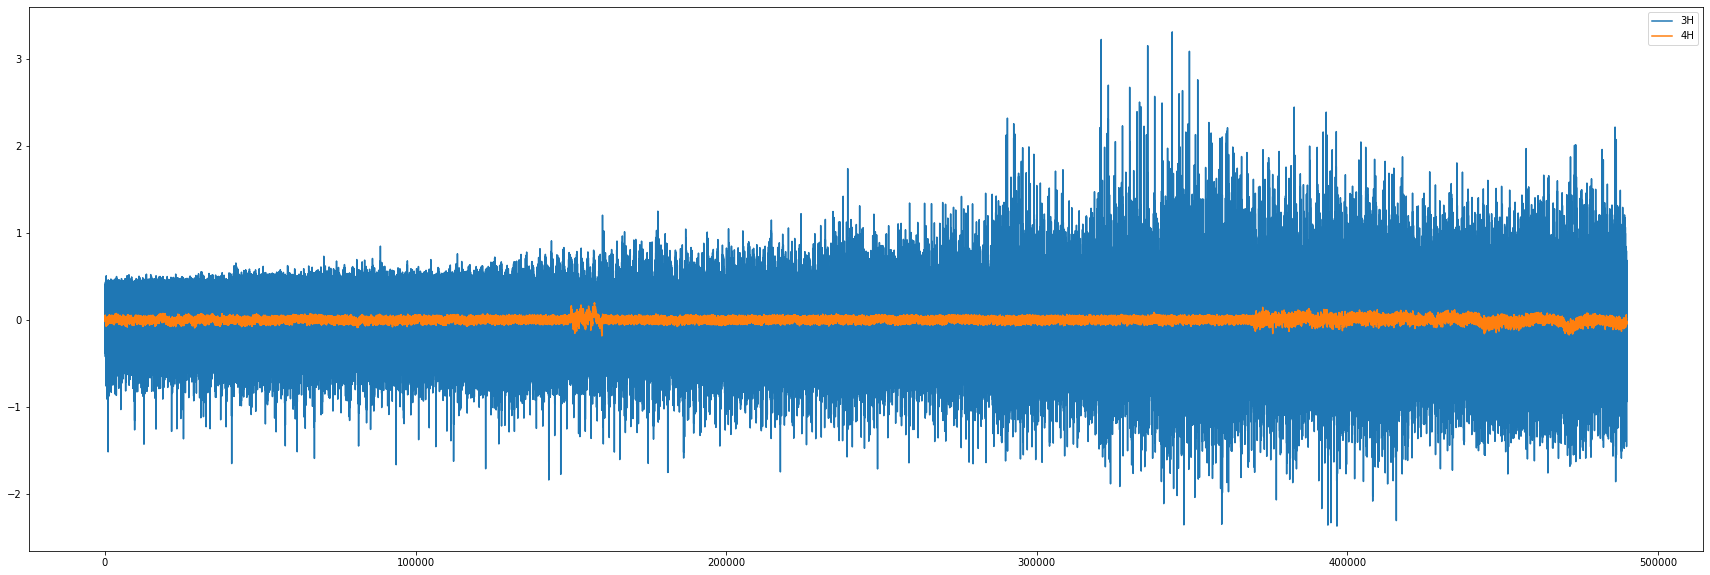

In [35]:
df_normal[['3H', '4H']].plot(figsize=(30,10));

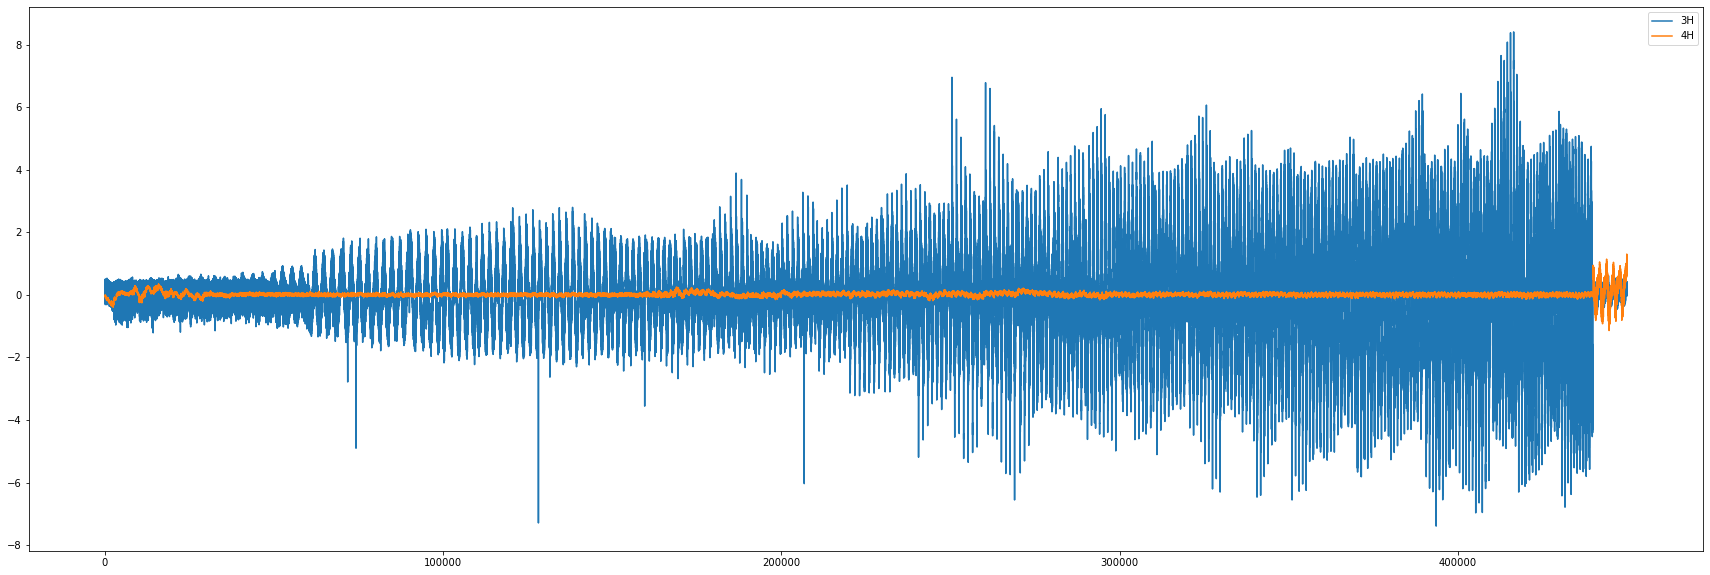

In [36]:
df_desbalanceado[['3H', '4H']].plot(figsize=(30,10));

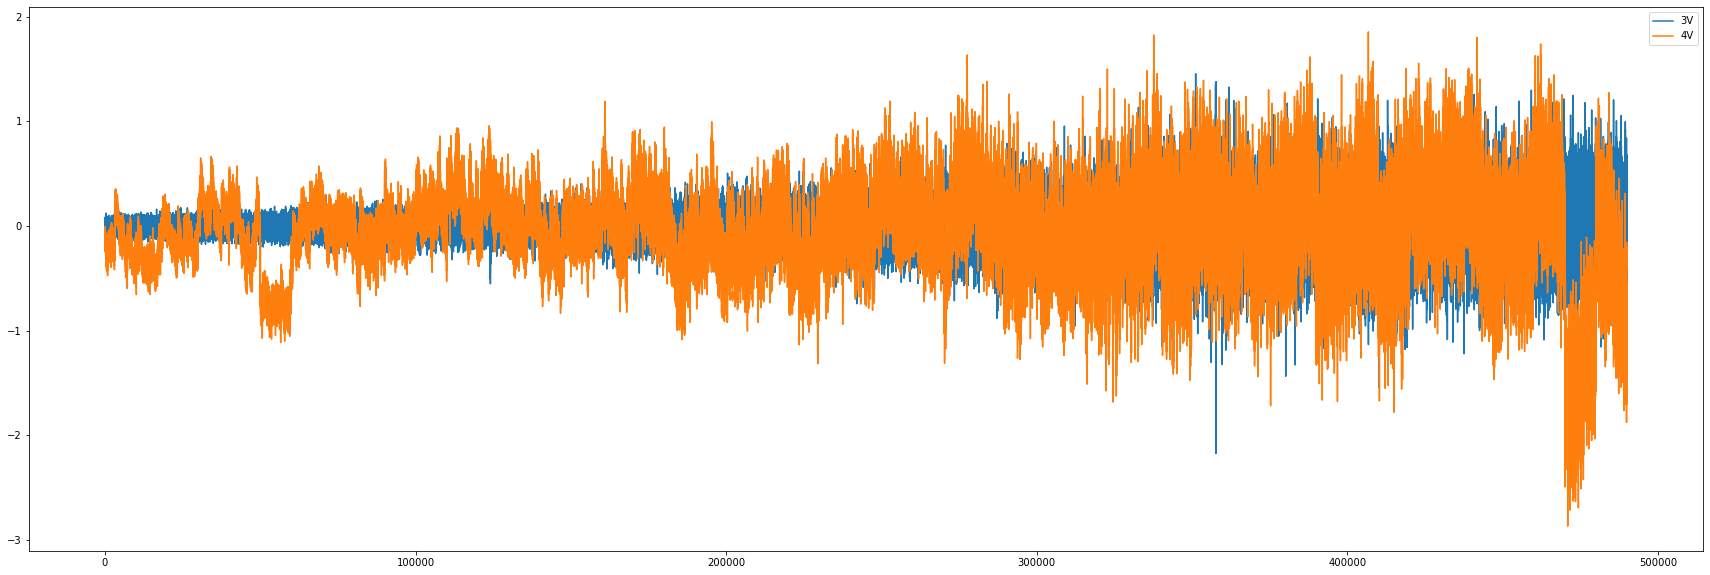

In [37]:
df_normal[['3V', '4V']].plot(figsize=(30,10));

In [38]:
# exportando o dataframe concatenado para um arquivo csv
from pathlib import Path  
filepath = Path(r'C:\Users\Antonio\Documents\pos_IA\16projeto_integrado\dados\imbalance\35g\desbalanceado_concatenado.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)
df_desbalanceado.to_csv(filepath)

Repetindo tudo com os arquivos do equipamento desalinhado horizontal

In [39]:
# gerando a lista com os arquivos do diretório
lista_arquivo = []
for arquivo in glob.glob(r'C:\Users\Antonio\Documents\pos_IA\16projeto_integrado\dados\horizontal-misalignment\2.0mm\*csv'):
    lista_arquivo.append(arquivo)


In [40]:
# Total de arquivos deste diretório
print(len(lista_arquivo))

50


In [41]:
# Criando os dataframes e nomeando as colunas
dataframes = []
for arquivo in lista_arquivo:
    dataframes.append(pd.read_csv(arquivo, sep=',', names=['Tacômetro', '3A','3H','3V', '4A', '4H', '4V', 'Microfone']))


C:\Users\Antonio\AppData\Local\Temp\ipykernel_8284\3786548650.py:4: DtypeWarning: Columns (1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(arquivo, sep=',', names=['Tacômetro', '3A','3H','3V', '4A', '4H', '4V', 'Microfone']))


In [42]:
# Reduzindo a quantidade de linhas dos dataframes para facilitar o processamento
reduzidos = []
for dataframe in dataframes:
    reduzidos.append(dataframe[120000:130000])

In [43]:
# concatenando os dataframes reduzidos, o 'ignore_index' serve para ignorar os índices, ou seja,
# criar um índice pela concatenização.
reduzidos_concatenados = pd.concat(reduzidos, ignore_index=True)

In [44]:
# Criando um label para os dados
reduzidos_concatenados['Condição'] = 'Desalinhamento_Horizontal'

In [45]:
# eliminando a coluna 'Tacômetro'
df_desHorizontal = reduzidos_concatenados.iloc[:,1:]
df_desHorizontal.tail()

,3A,3H,3V,4A,4H,4V,Microfone,Condição
499996,-0.093287,-0.15276,0.13194,0.001514,0.77815,0.1148,Desalinhamento_Horizontal,Desalinhamento_Horizontal
499997,0.5408,-0.18473,0.13445,0.002913,0.81438,-0.16262,Desalinhamento_Horizontal,Desalinhamento_Horizontal
499998,0.12393,-0.20656,0.13436,0.003336,0.81518,0.10704,Desalinhamento_Horizontal,Desalinhamento_Horizontal
499999,0.11339,-0.19471,0.12811,0.002001,0.72557,-0.10509,Desalinhamento_Horizontal,Desalinhamento_Horizontal
500000,0.14653,-0.12687,0.18038,-0.000476,0.56348,0.03517,Desalinhamento_Horizontal,Desalinhamento_Horizontal


In [46]:
df_desHorizontal.shape

(500001, 8)

In [47]:
df_desHorizontal.describe()

,3A,3H,3V,4A,4H,4V,Microfone,Condição
count,500001.0000,500001.00000,500001.00000,500001.0000,500001.000000,500001.0000,500001,500001
unique,192767.0000,174278.00000,147099.00000,112220.0000,53101.000000,193046.0000,33768,1
top,1.0713,0.13928,0.13554,0.1154,0.002072,1.0384,Desalinhamento_Horizontal,Desalinhamento_Horizontal
freq,31.0000,18.00000,21.00000,29.0000,60.000000,19.0000,10001,500001


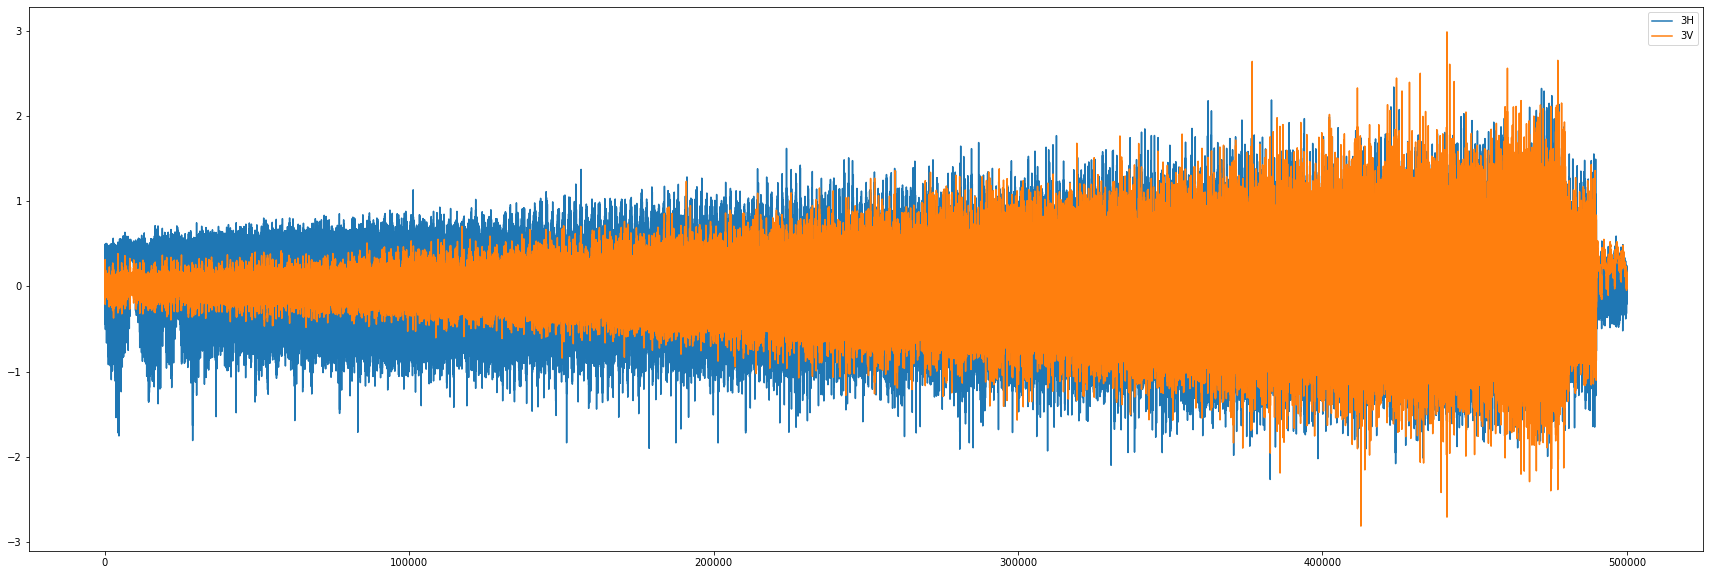

In [48]:
df_desHorizontal[['3H','3V']].plot(figsize=(30,10));

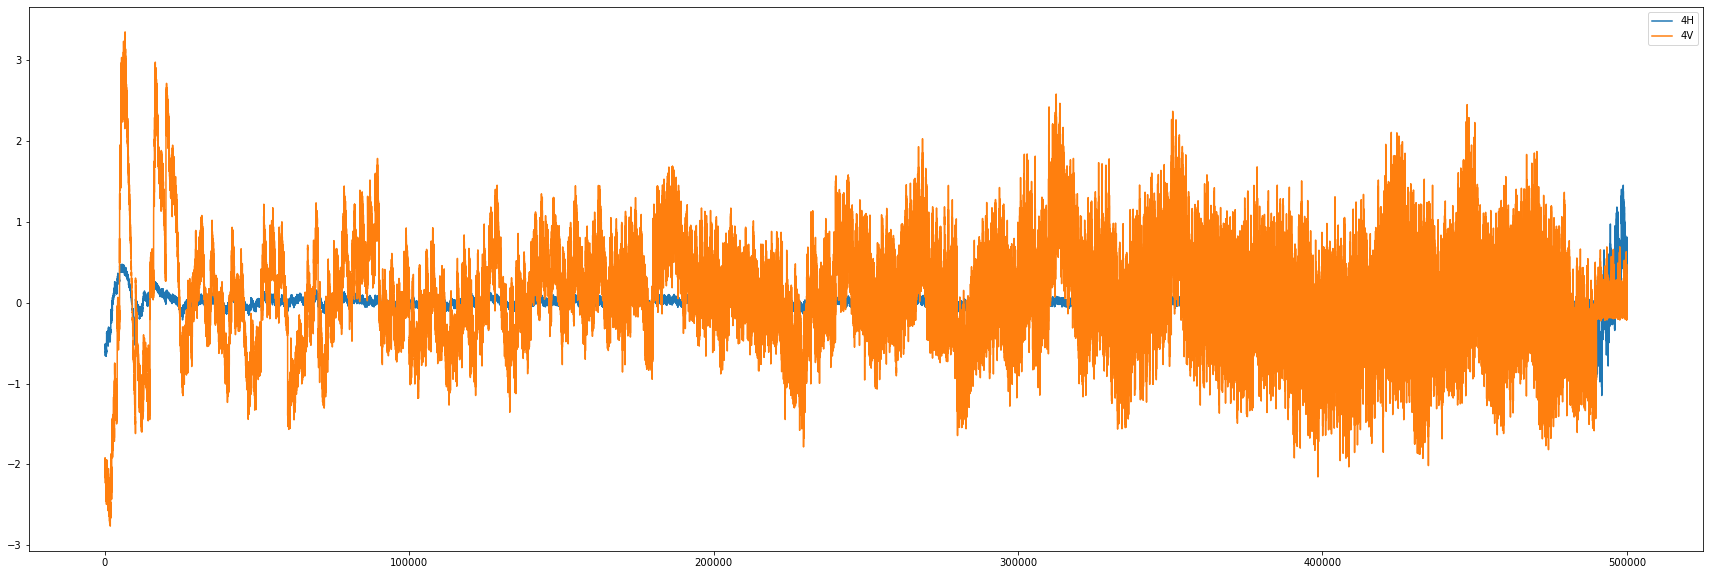

In [49]:
df_desHorizontal[['4H','4V']].plot(figsize=(30,10));

In [50]:
# exportando o dataframe concatenado para um arquivo csv
from pathlib import Path
filepath = Path(r'C:\Users\Antonio\Documents\pos_IA\16projeto_integrado\dados\horizontal-misalignment\2.0mm\desHorizontal_concatenado.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df_desHorizontal.to_csv(filepath)

Repetindo tudo com os arquivos do equipamento desalinhado vertical

In [51]:
# gerando a lista com os arquivos do diretório
lista_arquivo = []
for arquivo in glob.glob(r'C:\Users\Antonio\Documents\pos_IA\16projeto_integrado\dados\vertical-misalignment\1.90mm\*csv'):
    lista_arquivo.append(arquivo)

In [52]:
# Total de arquivos deste diretório
print(len(lista_arquivo))

51


In [53]:
# Criando os dataframes e nomeando as colunas
dataframes = []
for arquivo in lista_arquivo:
    dataframes.append(pd.read_csv(arquivo, sep=',', names=['Tacômetro', '3A','3H','3V', '4A', '4H', '4V', 'Microfone']))


C:\Users\Antonio\AppData\Local\Temp\ipykernel_8284\3786548650.py:4: DtypeWarning: Columns (1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(arquivo, sep=',', names=['Tacômetro', '3A','3H','3V', '4A', '4H', '4V', 'Microfone']))


In [54]:
# Reduzindo a quantidade de linhas dos dataframes para facilitar o processamento
reduzidos = []
for dataframe in dataframes:
    reduzidos.append(dataframe[120000:130000])

In [55]:
# concatenando os dataframes reduzidos, o 'ignore_index' serve para ignorar os índices, ou seja,
# criar um índice pela concatenização.
reduzidos_concatenados = pd.concat(reduzidos, ignore_index=True)

In [56]:
# Criando um label para os dados
reduzidos_concatenados['Condição'] = 'Desalinhamento_Vertical'

In [57]:
# eliminando a coluna 'Tacômetro'
df_desVertical = reduzidos_concatenados.iloc[:,1:]
df_desVertical.tail()

,3A,3H,3V,4A,4H,4V,Microfone,Condição
509996,0.77662,0.7963,2.6707,-0.043449,0.006891,-0.073979,-0.3337,Desalinhamento_Vertical
509997,0.028588,0.020803,1.5822,-0.046737,0.007835,-0.10749,0.38493,Desalinhamento_Vertical
509998,0.56228,0.78758,0.24087,-0.035408,0.010363,-0.069818,-0.30164,Desalinhamento_Vertical
509999,-0.52991,0.3118,-0.89171,-0.032878,0.012391,-0.085417,0.25054,Desalinhamento_Vertical
510000,-0.37392,0.15319,-1.5629,-0.029956,0.010691,-0.16252,-0.063326,Desalinhamento_Vertical


In [58]:
# exportando o dataframe concatenado para um arquivo csv
from pathlib import Path
filepath = Path(r'C:\Users\Antonio\Documents\pos_IA\16projeto_integrado\dados\vertical-misalignment\1.90mm\desVertical_concatenado.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df_desVertical.to_csv(filepath)

Preparação dos Dados Para o treinamento do Modelo

In [59]:
df_final = pd.concat([df_desbalanceado, df_desHorizontal, df_desVertical, df_normal], axis=0)


In [60]:
df_final.describe()

,3A,3H,3V,4A,4H,4V,Microfone,Condição
count,1.950003e+06,1.950003e+06,1.950003e+06,1.950003e+06,1.950003e+06,1.950003e+06,1950003,1950003
unique,2.482310e+05,2.674200e+05,2.205680e+05,2.319400e+05,7.892800e+04,2.701490e+05,43398,4
top,1.028200e+00,3.075700e-01,1.013000e-01,1.083800e-01,1.712100e-02,1.010300e+00,Desalinhamento_Horizontal,Desalinhamento_Vertical
freq,8.500000e+01,3.700000e+01,5.200000e+01,6.600000e+01,1.670000e+02,4.200000e+01,10001,510001


In [61]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950003 entries, 0 to 489999
Data columns (total 8 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   3A         object
 1   3H         object
 2   3V         object
 3   4A         object
 4   4H         object
 5   4V         object
 6   Microfone  object
 7   Condição   object
dtypes: object(8)
memory usage: 133.9+ MB


In [62]:
df_final['3A'] = df_final['3A'].astype(float, errors = 'raise')
df_final['3H'] = df_final['3H'].astype(float, errors = 'raise')
df_final['3V'] = df_final['3V'].astype(float, errors = 'raise')
df_final['4A'] = df_final['4A'].astype(float, errors = 'raise')
df_final['4H'] = df_final['4H'].astype(float, errors = 'raise')
df_final['4V'] = df_final['4V'].astype(float, errors = 'raise')
###data.drop(["Team", "Weight"], axis = 1, inplace = True)


In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950003 entries, 0 to 489999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   3A         float64
 1   3H         float64
 2   3V         float64
 3   4A         float64
 4   4H         float64
 5   4V         float64
 6   Microfone  object 
 7   Condição   object 
dtypes: float64(6), object(2)
memory usage: 133.9+ MB


In [67]:
df_final.drop('Microfone', axis=1, inplace=True)
df_final.head()

,3A,3H,3V,4A,4H,4V,Condição
0,1.38820,0.378880,0.004087,-0.31487,-0.014177,-0.17457,Desbalanceado
1,0.65285,-0.008811,-0.036859,-0.34948,-0.027327,-0.19829,Desbalanceado
2,0.86068,0.236280,-0.028984,-0.35797,-0.017951,-0.20064,Desbalanceado
3,1.20710,0.118150,-0.027822,-0.33238,-0.020319,-0.16756,Desbalanceado
4,0.59546,-0.042300,-0.038420,-0.38188,-0.016411,-0.19427,Desbalanceado


In [68]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950003 entries, 0 to 489999
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   3A        float64
 1   3H        float64
 2   3V        float64
 3   4A        float64
 4   4H        float64
 5   4V        float64
 6   Condição  object 
dtypes: float64(6), object(1)
memory usage: 119.0+ MB


In [71]:
# exportando o dataframe final para um arquivo csv
from pathlib import Path
filepath = Path(r'C:\Users\Antonio\Documents\pos_IA\16projeto_integrado\final.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df_final.to_csv(filepath)